<h1>Citibike Network Assignment</h1>
<li>The file, 2014-01 - Citi Bike trip data.csv, contains citibike trip data from January 2014 (a reasonable sized file!)
<li>The data:<br>
"tripduration","starttime","stoptime","start station id","start station name","start station latitude","start station longitude","end station id","end station name","end station latitude","end station longitude","bikeid","usertype","birth year","gender"
<li>Each record in the data is a trip 
<li>The data is described at https://www.citibikenyc.com/system-data

<h1>STEP 1: Read the data into a dataframe</h1>
<li>Convert station ids to str if necessary

In [8]:
import pandas as pd
import numpy as np
datafile = "2014-01+-+Citi+Bike+trip+data.csv"
df = pd.read_csv(datafile)

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

<h1>STEP 2: Basic cleaning</h1>
<li>Remove data that have any nans in any row (none in this file but others do have nans)
<li>and convert stationids to str 

In [10]:
def convert_to_strings(station_id):
    station_id=str(station_id)
    return station_id

df['start station id']=df['start station id'].apply(convert_to_strings)
df['end station id']=df['end station id'].apply(convert_to_strings)

df=df.dropna(how='any')

In [7]:
df['start station id'][0]

2

<h1>STEP 3: Write a function that returns a graph given a citibike data frame</h1> 
<li>Your function should return two things:
<ol>
<li>a graph
<li>a dictionary with station ids as the key and station name as the value
</ol>
<li>The graph should contain 
<ol>
<li>nodes (station ids)
<li>edges (station id, station id)
<li>edge data 
<ol>
<li>count: number of trips on the edge
<li>time: average duration - pickup to dropoff - on that edge
</ol>
</ol>
<li><b>Note:</b> the edge (x1,y1) is the same as (y1,x1) even though the start station ids and end station ids are flipped in the dataframe

In [13]:
import networkx as nx

def get_citibike_graph(df): 
    G = nx.Graph()
    node_names = dict()
    
    #populating node names
    for i in range(len(df)):
        if (df['start station id'].iloc[i]==df['end station id'].iloc[i]):
            node_names[df['start station id'].iloc[i]]=df['start station name'].iloc[i]
        else:
            node_names[df['start station id'].iloc[i]]=df['start station name'].iloc[i]
            node_names[df['end station id'].iloc[i]]=df['end station name'].iloc[i]    
    
    starting=list()
    ending=list()
    
    for i in range(len(df)):
        if df['start station id'].iloc[i]<=df['end station id'].iloc[i]:
            starting.append(df['start station id'].iloc[i])
            ending.append(df['end station id'].iloc[i])
        else:
            ending.append(df['start station id'].iloc[i])
            starting.append(df['end station id'].iloc[i])
        
    df['new start id']=starting
    df['new end id']=ending
    
    df1=df.groupby(['new start id','new end id'])
    df2=df1['tripduration'].agg(['mean','count'])
    df3=df2.reset_index()
    
    for i in range(len(df3)):
        G.add_edge(df3['new start id'].iloc[i],df3['new end id'].iloc[i],
                  data1=df3['mean'].iloc[i],data2=df3['count'].iloc[i])

    
    return G,node_names

<h1>STEP 4: Create the following graphs using the function above</h1>
<li>G: A graph of all the data in the dataframe
<li>m_G: A graph containing only data from male riders
<li>f_G: A graph containing only data from female riders
<li>Note: for m_G and f_G you will need to extract data from the dataframe

In [14]:
G,nodes=get_citibike_graph(df)

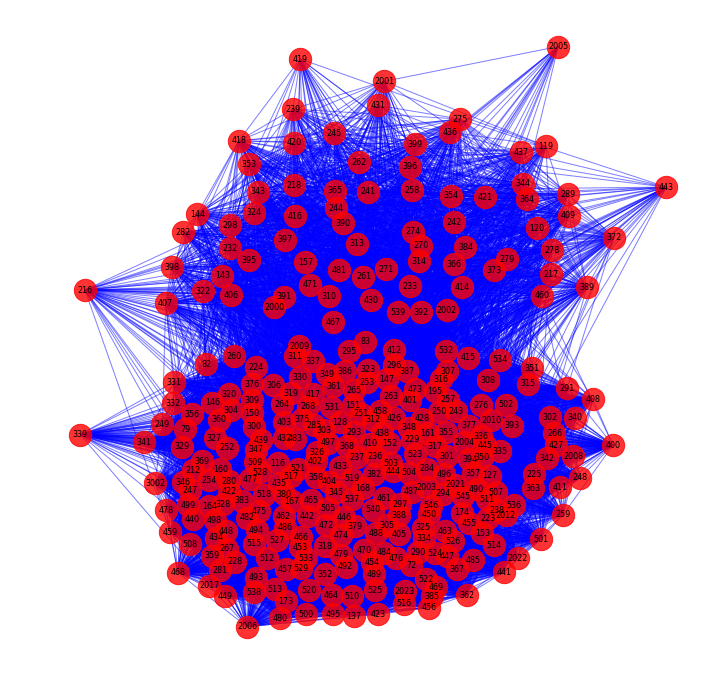

In [15]:
pos=nx.spring_layout(G,k=0.2)
fig=plt.figure(1,figsize=(12,12))
nx.draw_networkx_nodes(G,pos,
                       node_color='r',
                       node_size=500,
                      alpha=0.8)

nx.draw_networkx_edges(G,pos,
                       edgelist=G.edges(),
                       width=1,alpha=0.5,edge_color='b')
node_name={}
for i in G.nodes():
    node_name[i]=str(i)

nx.draw_networkx_labels(G,pos,node_name,font_size=8)

plt.axis('off')
plt.show()

C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


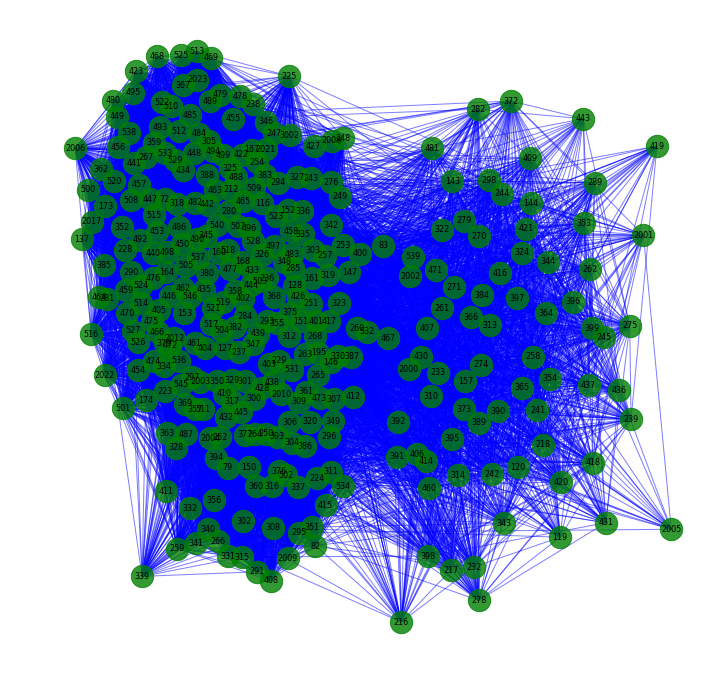

In [16]:
G_m,nodes=get_citibike_graph(df[df['gender']==1])


pos=nx.spring_layout(G_m,k=0.2)
fig=plt.figure(1,figsize=(12,12))
nx.draw_networkx_nodes(G_m,pos,
                       node_color='g',
                       node_size=500,
                      alpha=0.8)

nx.draw_networkx_edges(G_m,pos,
                       edgelist=G_m.edges(),
                       width=1,alpha=0.5,edge_color='b')
node_name={}
for i in G_m.nodes():
    node_name[i]=str(i)

nx.draw_networkx_labels(G_m,pos,node_name,font_size=8)

plt.axis('off')
plt.show()

    

C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


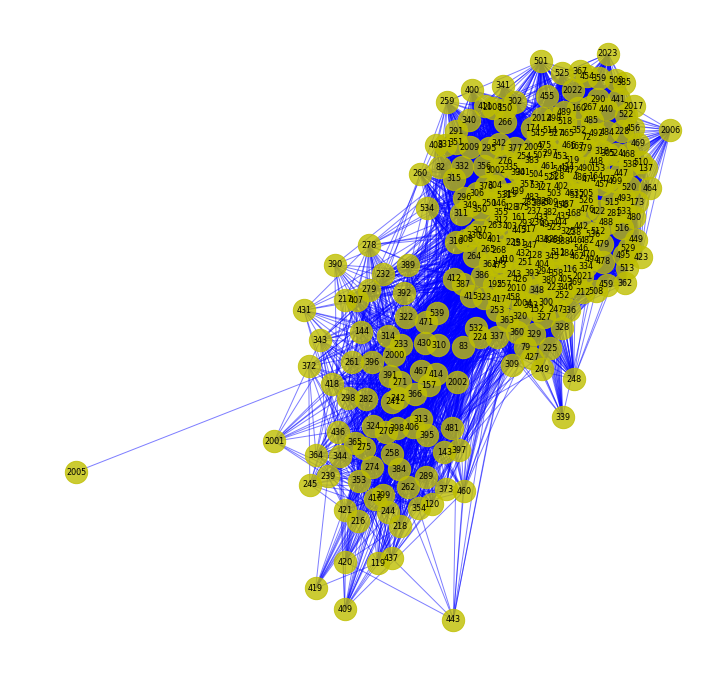

In [17]:
G_f,nodes=get_citibike_graph(df[df['gender']==2])


pos=nx.spring_layout(G_f,k=0.2)
fig=plt.figure(1,figsize=(12,12))
nx.draw_networkx_nodes(G_f,pos,
                       node_color='y',
                       node_size=500,
                       alpha=0.8)

nx.draw_networkx_edges(G_f,pos,
                       edgelist=G_f.edges(),
                       width=1,alpha=0.5,edge_color='b')
node_name={}
for i in G_f.nodes():
    node_name[i]=str(i)

nx.draw_networkx_labels(G_f,pos,node_name,font_size=8)

plt.axis('off')
plt.show()

    

<h1>STEP 5: Answer the following questions for each of the graphs</h1>
<ol>
<li>Which station (name) is the best connected (max degree)?
<li>Travel between which pair of stations is the longest in terms of average duration between bike pickups and dropoffs. Report both the two stations as well as the time in minutes
<li>Which edge is associated with the most number of trips?
<li>Which station is the most central?
<li>Which node is a bottleneck node?

Which station (name) has the greatest number of connections (max degree)?

In [18]:
d=nx.degree(G_f)
l=list(d)
print(f"Busiest female station {nodes[max(l,key=lambda x:x[1])[0]]}")

d=nx.degree(G_m)
l=list(d)
print(f"Busiest male station {nodes[max(l,key=lambda x:x[1])[0]]}")

d=nx.degree(G)
l=list(d)
print(f"Busiest station {nodes[max(l,key=lambda x:x[1])[0]]}")



Busiest female station E 17 St & Broadway
Busiest male station Lawrence St & Willoughby St
Busiest station Lawrence St & Willoughby St


Travel between which pair of stations is the longest in terms of average duration between bike pickups and dropoffs

In [26]:
maximum=0
max_start=''
max_end=''
for i in G_m.edges(data=True):
        if i[2]['data1']>maximum:
            maximum=i[2]['data1']
            max_start=i[0]
            max_end=i[1]
    
print(f"Longest average distance males: {nodes[max_end]} to {nodes[max_start]}. Minutes {int(maximum/60)}")

maximum=0
max_start=''
max_end=''
for i in G_f.edges(data=True):
        if i[2]['data1']>maximum:
            maximum=i[2]['data1']
            max_start=i[0]
            max_end=i[1]
    
print(f"Longest average distance females: {nodes[max_end]} to {nodes[max_start]}. Minutes {int(maximum/60)}")

maximum=0
max_start=''
max_end=''
for i in G.edges(data=True):
        if i[2]['data1']>maximum:
            maximum=i[2]['data1']
            max_start=i[0]
            max_end=i[1]
    
print(f"Longest average distance all: {nodes[max_end]} to {nodes[max_start]}. Minutes {int(maximum/60)}")


            

Longest average distance males: W 43 St & 6 Ave to Warren St & Church St. Minutes 6640
Longest average distance females: S Portland Ave & Hanson Pl to Flushing Ave & Carlton Ave. Minutes 9093
Longest average distance all: S Portland Ave & Hanson Pl to Flushing Ave & Carlton Ave. Minutes 9093


Which edge is associated with the most number of trips?


In [28]:
maximum=0
max_start=''
max_end=''
for i in G_m.edges(data=True):
    if i[2]['data2']>maximum:
        maximum=i[2]['data2']
        max_start=i[0]
        max_end=i[1]
        max_time=i[2]['data1']
            
print(f"most trip route males: {nodes[max_start]} to {nodes[max_end]}. Minutes {int(max_time/60)}")

maximum=0
max_start=''
max_end=''
for j in G_f.edges(data=True):
    if j[2]['data2']>maximum:
        maximum=j[2]['data2']
        max_start=j[0]
        max_end=j[1]
        max_time=j[2]['data1']
            
print(f"most trip route females: {nodes[max_start]} to {nodes[max_end]}. Minutes {int(max_time/60)}")

maximum=0
max_start=''
max_end=''
for h in G.edges(data=True):
    if h[2]['data2']>maximum:
        maximum=h[2]['data2']
        max_start=h[0]
        max_end=h[1]
        max_time=h[2]['data1']
            
print(f"most trip route all: {nodes[max_start]} to {nodes[max_end]}. Minutes {int(max_time/60)}")





most trip route males: E 43 St & Vanderbilt Ave to W 41 St & 8 Ave. Minutes 7
most trip route females: Lafayette St & E 8 St to E 7 St & Avenue A. Minutes 5
most trip route all: E 43 St & Vanderbilt Ave to W 41 St & 8 Ave. Minutes 7


<h2>Centrality</h2>
One of the concerns that the citibike system has to deal with is ensuring that no station has empty slots (a bike should always be available) and that no station should have no empty slots (you should be able to return a bike). To do this, it needs to monitor the movement of bikes through the system, ideally using a directed graph. Though our graph is not directed, we can look at some network characteristics that will help us answer these questions. Note that the "trips" feature in edge data captures flows.
<li>Which node is a possible bottleneck node in terms of bike flows?
<li>Which node is the "nearest" to all other nodes (irrespective of flows)
<li>Which node is the "nearest" to all other nodes (in terms of distance = time)
<li>Which nodes are peripheral (most likely to be underserved)

In [35]:
from networkx.algorithms import closeness_centrality
from networkx.algorithms import communicability
from collections import OrderedDict

#For all riders
bc=nx.betweenness_centrality(G,weight='data2')
b_c=sorted(bc.items(),key=lambda x:x[1],reverse=True)
print(f"Possible Bottleneck for all riders {nodes[b_c[0][0]]}")

cc=nx.closeness_centrality(G)
c_c=sorted(cc.items(),key=lambda x:x[1],reverse=True)
print(f"Nearest to all other nodes for all riders {nodes[c_c[0][0]]}")

ccd=nx.closeness_centrality(G,distance='data1')
c_cd=sorted(ccd.items(),key=lambda x:x[1],reverse=True)
print(f"Nearest to all other nodes using distance {nodes[c_cd[0][0]]}")


Possible Bottleneck for all riders Atlantic Ave & Fort Greene Pl
Nearest to all other nodes for all riders Lawrence St & Willoughby St
Nearest to all other nodes using distance Fulton St & Rockwell Pl


In [22]:
peripheral = nx.periphery(G)
print("In graph G, peripheral nodes are ",peripheral)

In graph G, peripheral nodes are  ['423', '419', '339', '456', '2005']
For male riders, peripheral nodes are  ['137', '423', '2001', '289', '2006', '266', '339', '419', '456', '2005']
For female riders, peripheral nodes are  ['522', '464', '501', '339', '2006', '2005']


In [ ]:
#Extra!!


# #For Male riders
# print("Working on Male Riders")
# bc=nx.betweenness_centrality(G_m)
# b_c=sorted(bc.items(),key=lambda x:x[1],reverse=True)
# print(f"Possible Bottleneck {nodes[b_c[0][0]]}")

# cc=nx.closeness_centrality(G_m)
# c_c=sorted(cc.items(),key=lambda x:x[1],reverse=True)
# print(f"Nearest to all other nodes {nodes[c_c[0][0]]}")

# ccd=nx.closeness_centrality(G_m,distance='mean')
# c_cd=sorted(ccd.items(),key=lambda x:x[1],reverse=True)
# print(f"Nearest to all other nodes {nodes[c_cd[0][0]]}")

# #For Female riders
# print("Working on Female riders")
# bc=nx.betweenness_centrality(G_f)
# b_c=sorted(bc.items(),key=lambda x:x[1],reverse=True)
# print(f"Possible Bottleneck {nodes[b_c[0][0]]}")

# cc=nx.closeness_centrality(G_f)
# c_c=sorted(cc.items(),key=lambda x:x[1],reverse=True)
# print(f"Nearest to all other nodes {nodes[c_c[0][0]]}")

# ccd=nx.closeness_centrality(G_f,distance='mean')
# c_cd=sorted(ccd.items(),key=lambda x:x[1],reverse=True)
# print(f"Nearest to all other nodes {nodes[c_cd[0][0]]}")

# peripheral = nx.periphery(G_m)
# print("For male riders, peripheral nodes are ",peripheral)

# peripheral = nx.periphery(G_f)
# print("For female riders, peripheral nodes are ",peripheral)
